<a href="https://colab.research.google.com/github/Yasser1Aboussikine/lookalike/blob/main/LFW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data shape: (1348, 2914), Classes: 8


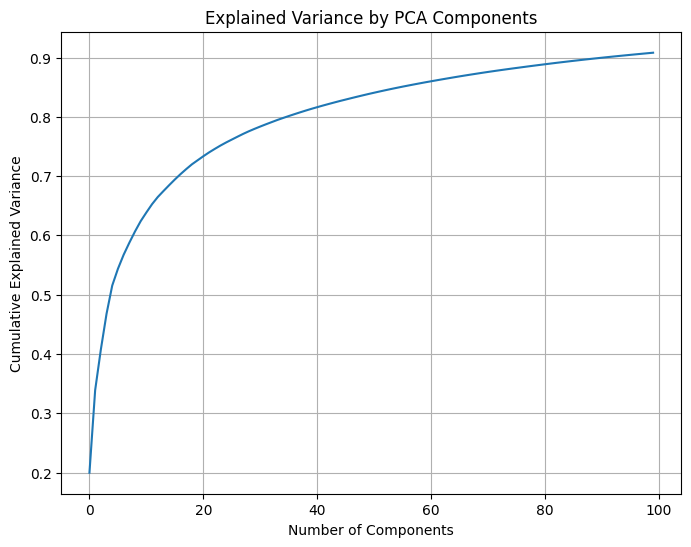


✅ Evaluation Metrics:
Accuracy:  0.8279
Precision: 0.8476
Recall:    0.8279
F1 Score:  0.8248

📋 Classification Report:
                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.53      0.69        19
     Colin Powell       0.69      0.92      0.79        59
  Donald Rumsfeld       0.83      0.80      0.81        30
    George W Bush       0.88      0.89      0.88       133
Gerhard Schroeder       0.77      0.89      0.83        27
      Hugo Chavez       1.00      0.61      0.76        18
Junichiro Koizumi       1.00      0.53      0.70        15
       Tony Blair       0.85      0.81      0.83        36

         accuracy                           0.83       337
        macro avg       0.88      0.75      0.79       337
     weighted avg       0.85      0.83      0.82       337



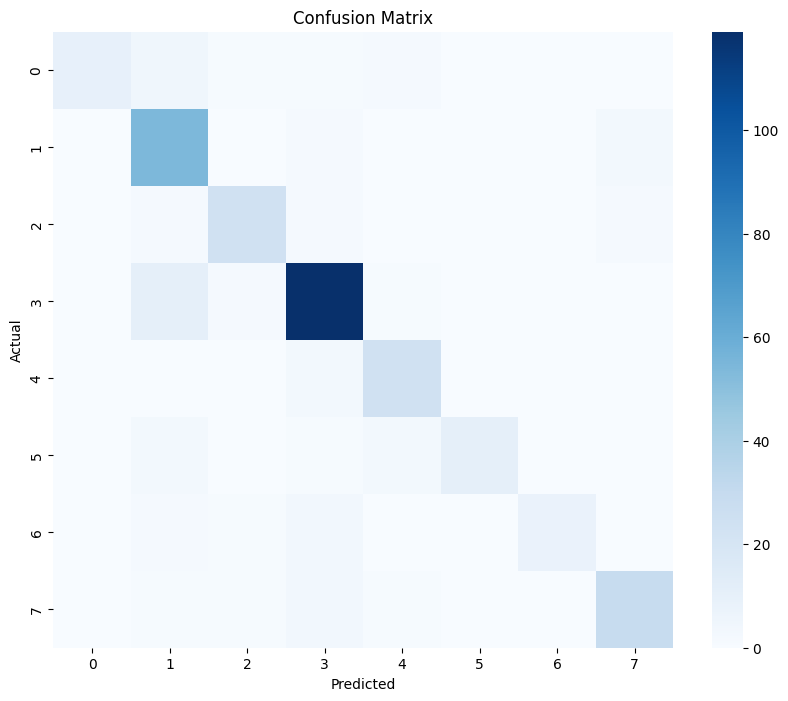

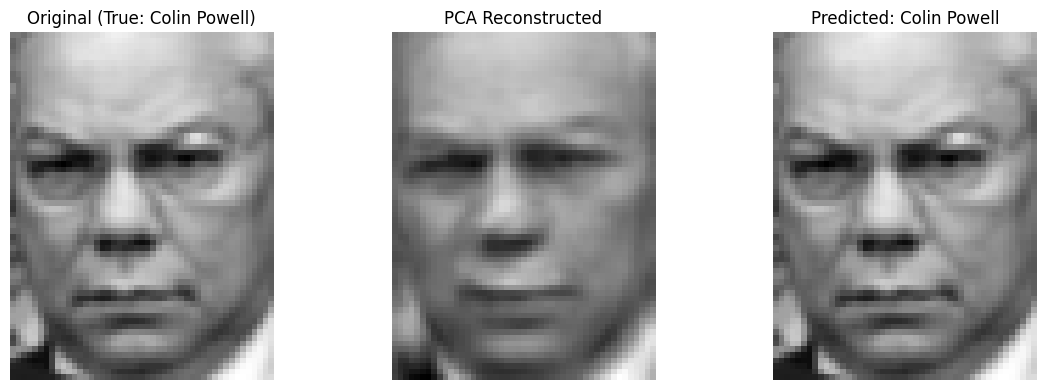

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)
import cv2

# ======================
# ✅ Load LFW Dataset
# ======================
lfw_people = fetch_lfw_people(min_faces_per_person=60, resize=0.5)
X = lfw_people.data
y = lfw_people.target
target_names = lfw_people.target_names
image_shape = lfw_people.images[0].shape

print(f"Data shape: {X.shape}, Classes: {len(target_names)}")

# ======================
# 📦 Split dataset
# ======================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# ======================
# 📉 Apply PCA
# ======================
pca = PCA(n_components=100, whiten=True, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# 🔍 Visualize variance
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

# ======================
# 🧠 Train SVM
# ======================
param_grid = {'C': [1, 10, 100], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(SVC(class_weight='balanced'), param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train_pca, y_train)
svm_best = grid_search.best_estimator_

# ======================
# 📈 Evaluate
# ======================
y_pred = svm_best.predict(X_test_pca)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\n✅ Evaluation Metrics:")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# ======================
# 🔳 Confusion Matrix
# ======================
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ======================
# 🖼️ Visualize Prediction
# ======================
def visualize_prediction(index=0):
    original = X_test[index].reshape(image_shape)
    reduced = pca.inverse_transform(pca.transform([X_test[index]])).reshape(image_shape)
    pred_label = target_names[y_pred[index]]
    true_label = target_names[y_test[index]]

    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    axes[0].imshow(original, cmap='gray')
    axes[0].set_title(f"Original (True: {true_label})")
    axes[0].axis('off')

    axes[1].imshow(reduced, cmap='gray')
    axes[1].set_title("PCA Reconstructed")
    axes[1].axis('off')

    axes[2].imshow(original, cmap='gray')
    axes[2].set_title(f"Predicted: {pred_label}")
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

# 🔍 Show one prediction
visualize_prediction(index=0)

In [ ]:
import numpy as np
unique, counts = np.unique(lfw_people.target, return_counts=True)
for name, count in zip(lfw_people.target_names, counts):
    print(f"{name}: {count} images")

Ariel Sharon: 77 images
Colin Powell: 236 images
Donald Rumsfeld: 121 images
George W Bush: 530 images
Gerhard Schroeder: 109 images
Hugo Chavez: 71 images
Tony Blair: 144 images
